# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output-data/cities.csv"

# Output File Path (png)
png_path = "../output-data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)}")

615


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_list = []
lat = []
lng = []
temp = []
hmdty = []
cloudi = []
wspeed = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    time.sleep(1.2)
    response = requests.get(query_url + city).json()
    try:
        
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hmdty.append(response['main']['humidity'])
        cloudi.append(response['clouds']['all'])
        wspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city}")
    
    except (ValueError, KeyError):
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city} not found")


Processing record 1 of 615 | ambon
Processing record 2 of 615 | hermanus
Processing record 3 of 615 | smithers
Processing record 4 of 615 | menongue
Processing record 5 of 615 | gebre guracha
Processing record 6 of 615 | fevralsk not found
Processing record 7 of 615 | paita
Processing record 8 of 615 | beaufort
Processing record 9 of 615 | rocca priora
Processing record 10 of 615 | cabo san lucas
Processing record 11 of 615 | teterow
Processing record 12 of 615 | rikitea
Processing record 13 of 615 | nanortalik
Processing record 14 of 615 | vaini
Processing record 15 of 615 | punta arenas
Processing record 16 of 615 | cidreira
Processing record 17 of 615 | nyurba
Processing record 18 of 615 | upernavik
Processing record 19 of 615 | kavali
Processing record 20 of 615 | busselton
Processing record 21 of 615 | huarmey
Processing record 22 of 615 | yulara
Processing record 23 of 615 | porbandar
Processing record 24 of 615 | orotukan
Processing record 25 of 615 | faanui
Processing record 26

Processing record 205 of 615 | coihaique
Processing record 206 of 615 | tabiauea not found
Processing record 207 of 615 | oga
Processing record 208 of 615 | illoqqortoormiut not found
Processing record 209 of 615 | petropavlovka
Processing record 210 of 615 | liverpool
Processing record 211 of 615 | ust-kuyga
Processing record 212 of 615 | kudahuvadhoo
Processing record 213 of 615 | batemans bay
Processing record 214 of 615 | dehloran
Processing record 215 of 615 | maldonado
Processing record 216 of 615 | dryden
Processing record 217 of 615 | buala
Processing record 218 of 615 | wanning
Processing record 219 of 615 | thompson
Processing record 220 of 615 | karamea not found
Processing record 221 of 615 | saleaula not found
Processing record 222 of 615 | saint-georges
Processing record 223 of 615 | buenos aires
Processing record 224 of 615 | hami
Processing record 225 of 615 | zyryanka
Processing record 226 of 615 | longyearbyen
Processing record 227 of 615 | te anau
Processing record 2

Processing record 404 of 615 | bandar-e torkaman not found
Processing record 405 of 615 | salalah
Processing record 406 of 615 | torbat-e jam
Processing record 407 of 615 | berdigestyakh
Processing record 408 of 615 | lazaro cardenas
Processing record 409 of 615 | ruston
Processing record 410 of 615 | poso
Processing record 411 of 615 | naica
Processing record 412 of 615 | halalo not found
Processing record 413 of 615 | ambanja
Processing record 414 of 615 | waingapu
Processing record 415 of 615 | mizdah
Processing record 416 of 615 | ketchikan
Processing record 417 of 615 | the valley
Processing record 418 of 615 | bonthe
Processing record 419 of 615 | the pas
Processing record 420 of 615 | evensk
Processing record 421 of 615 | bossier city
Processing record 422 of 615 | palabuhanratu not found
Processing record 423 of 615 | halifax
Processing record 424 of 615 | dingle
Processing record 425 of 615 | krasnoarmeysk
Processing record 426 of 615 | safranbolu
Processing record 427 of 615 

Processing record 602 of 615 | katobu
Processing record 603 of 615 | tshikapa
Processing record 604 of 615 | balakhta
Processing record 605 of 615 | skala
Processing record 606 of 615 | gambela
Processing record 607 of 615 | obo
Processing record 608 of 615 | snezhnogorsk
Processing record 609 of 615 | beaune
Processing record 610 of 615 | macheng
Processing record 611 of 615 | wahpeton
Processing record 612 of 615 | grand river south east not found
Processing record 613 of 615 | southbridge
Processing record 614 of 615 | flinders
Processing record 615 of 615 | mountain home


## Convert Raw Data to DataFrame
* Save as csv

In [4]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hmdty,
    "Cloudiness": cloudi,
    "Wind Speed": wspeed,
    "Country": country,
    "Date": date
})

weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambon,-3.70,128.18,24.00,94,40,4.10,ID,1603033212
1,hermanus,-34.42,19.23,20.00,61,41,2.24,ZA,1603033214
2,smithers,54.78,-127.17,0.00,93,90,2.10,CA,1603033188
3,menongue,-14.66,17.69,34.76,12,0,3.39,AO,1603033216
4,gebre guracha,9.80,38.40,14.31,80,57,0.52,ET,1603033218


In [5]:
weather_df = pd.read_csv(output_data_file)


In [6]:
#pd.to_datetime(arg=weather_df["Date"], errors="coerce", utc=True, format="%d/%m/%Y")
from datetime import date

graph_date = date.fromtimestamp(weather_df["Date"][0])
print(graph_date)

2020-10-18


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [7]:
def graphs(x_values, y_values):
    graph_labels = {
        "Lat": "Latitude",
        "Max Temp": "Max Temperature (degrees C)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (m/s)"
    }
    plt.scatter(x_values, y_values, facecolors="skyblue", edgecolors="b")
    plt.xlabel(graph_labels[x_values.name])
    plt.ylabel(graph_labels[y_values.name])
    plt.title(f"City {graph_labels[y_values.name]} vs. {graph_labels[x_values.name]} ({graph_date})")

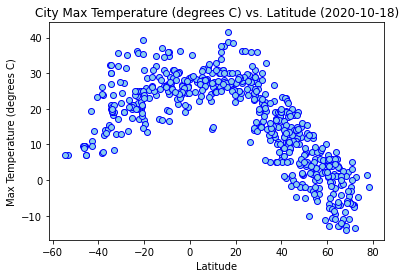

In [8]:
graphs(weather_df["Lat"],weather_df["Max Temp"])
plt.savefig(png_path+"max_temp_vs_lat.png")
plt.show()

### Latitude vs. Humidity Plot

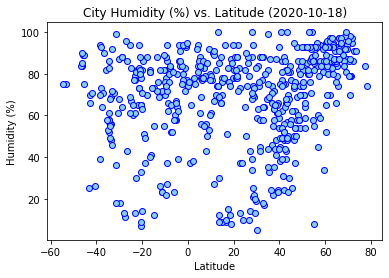

In [9]:
graphs(weather_df["Lat"],weather_df["Humidity"])
plt.savefig(png_path+"humidity_vs_lat.png")
plt.show()

### Latitude vs. Cloudiness Plot

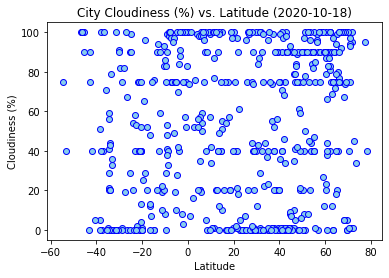

In [10]:
graphs(weather_df["Lat"],weather_df["Cloudiness"])
plt.savefig(png_path+"cloudiness_vs_lat.png")
plt.show()

### Latitude vs. Wind Speed Plot

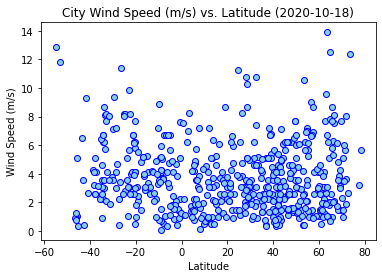

In [11]:
graphs(weather_df["Lat"],weather_df["Wind Speed"])
plt.savefig(png_path+"wind_speed_vs_lat.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [12]:
def regressions(x_values, y_values):
    graphs(x_values,y_values)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_values = x_values * slope + intercept

    plt.plot(x_values, regress_values, color="red")
    
    print(f"The data can be approximated with {line_eq}.")
    print(f"The r-value is {round(rvalue, 4)}. R-squared is {round(rvalue**2, 4)}.")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = -0.57x + 36.1.
The r-value is -0.8757. R-squared is 0.7669.


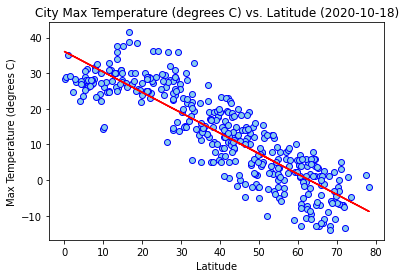

In [13]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Max Temp"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"max_temp_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = 0.31x + 29.65.
The r-value is 0.5703. R-squared is 0.3252.


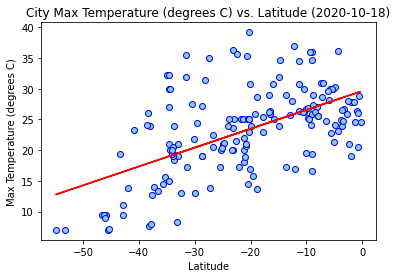

In [14]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Max Temp"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"max_temp_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.34x + 56.97.
The r-value is 0.2948. R-squared is 0.0869.


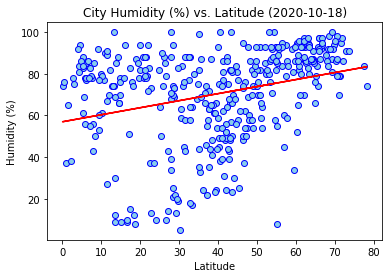

In [15]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Humidity"].loc[weather_df["Lat"]>0])
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.08x + 68.42.
The r-value is 0.0511. R-squared is 0.0026.


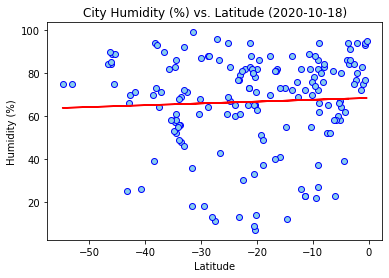

In [16]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Humidity"].loc[weather_df["Lat"]<0])
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.26x + 41.1.
The r-value is 0.1321. R-squared is 0.0174.


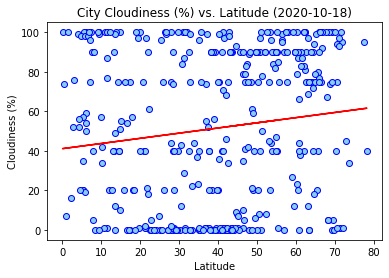

In [17]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Cloudiness"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"cloudiness_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.43x + 57.61.
The r-value is 0.1558. R-squared is 0.0243.


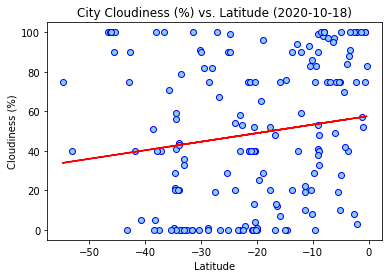

In [18]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Cloudiness"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"cloudiness_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = 0.01x + 2.98.
The r-value is 0.1133. R-squared is 0.0128.


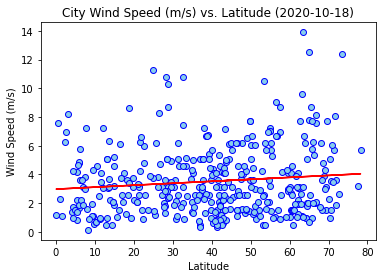

In [19]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Wind Speed"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"wind_speed_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = -0.04x + 3.23.
The r-value is -0.2081. R-squared is 0.0433.


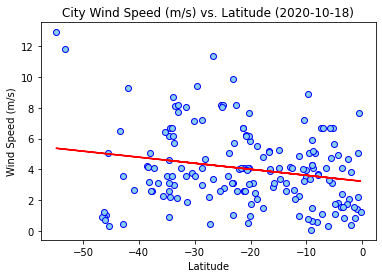

In [20]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Wind Speed"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"wind_speed_vs_lat_south.png")
plt.show()